# 3D segmentation example

In [1]:
import sys
# sys.path.append('/Users/jakob/Documents/RU/Code/segment')
import watershed3d
# from imutils import random_cmap
from skimage.morphology import watershed
import matplotlib as mpl
from skimage.measure import regionprops
import pandas as pd
import tifffile as tiff
from matplotlib.pylab import imshow, plot, subplots, hist, scatter, bar, step
# import imutils

load file 

In [18]:
filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/mouse_example/C1-Brachy_568_FoxA2_488_Cdx2_647_500um_2_filtered.tif'
w = watershed3d.Ws3d(filename)

image is three-dimensional
found probability map /Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c1_Probabilities.h5


check histogram of image data

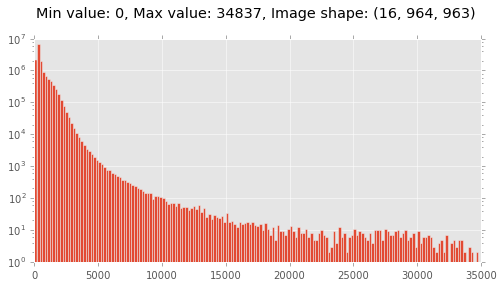

In [58]:
w.intensity_histogram()

In [61]:
# w.z_heat_map();

load Ilastik probability mask and plot it

In [20]:
w.load_mask(prob=0.5)
# w.plot_probability_map(21)

shape (16, 964, 963) (16, 964, 963)
loaded probability map


do segmentation without the object classifier

In [21]:
w.segment(sigma=(1,3,3), min_distance=1, compactness=0.1, opensize_small_objects=10)

segmentation done, found 1181 cells


show segmentation

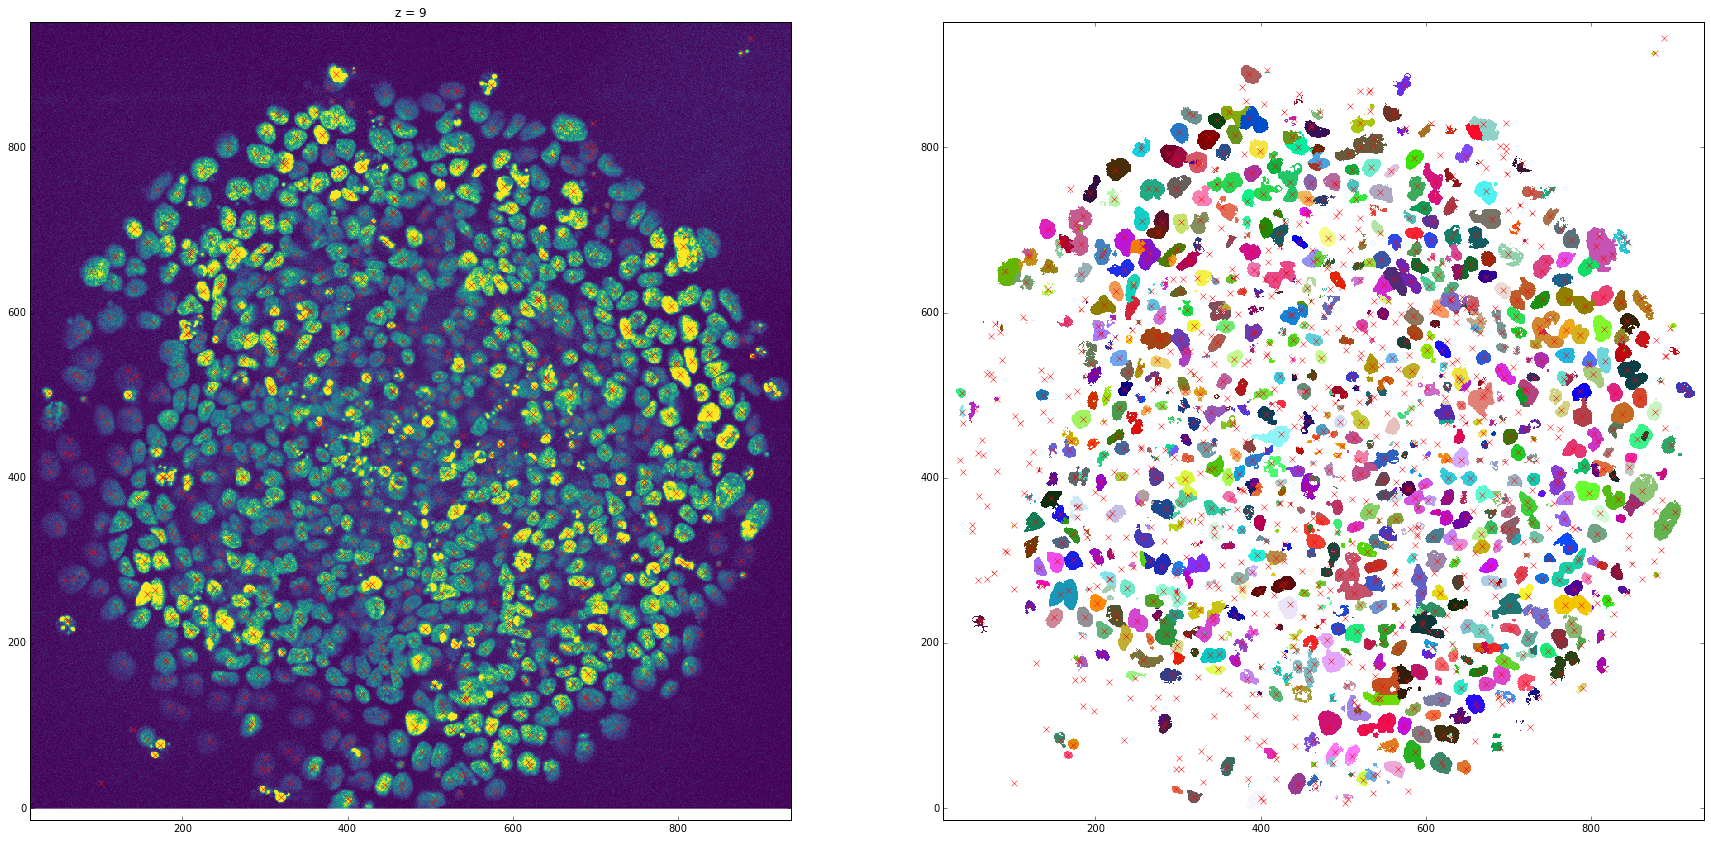

In [28]:
w.show_segmentation(z=9,figsize=(30,20))

In [29]:
w.df.head()

,area,total_intensity,mean_intensity,centroid
cell_id,,,,
1,482,680221.0,1411.246888,"[2.48547717842, 256.784232365, 412.962655602]"
2,2665,5080696.0,1906.452533,"[5.03902439024, 285.543339587, 297.856660413]"
3,1107,1583992.0,1430.887082,"[2.2908762421, 289.041553749, 535.677506775]"
4,1298,2727125.0,2101.020801,"[2.60400616333, 317.19183359, 555.352850539]"
5,409,556054.0,1359.545232,"[1.93887530562, 367.178484108, 562.718826406]"


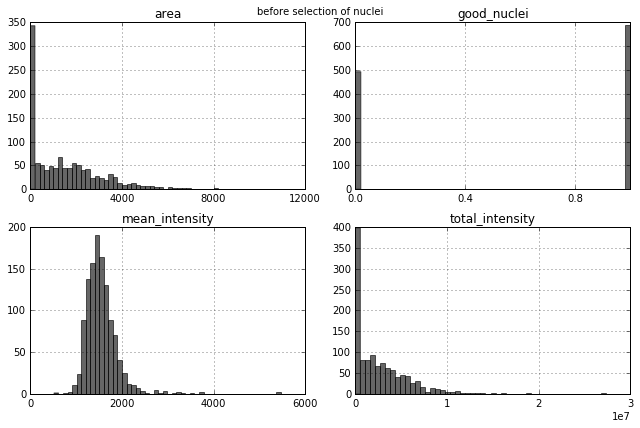

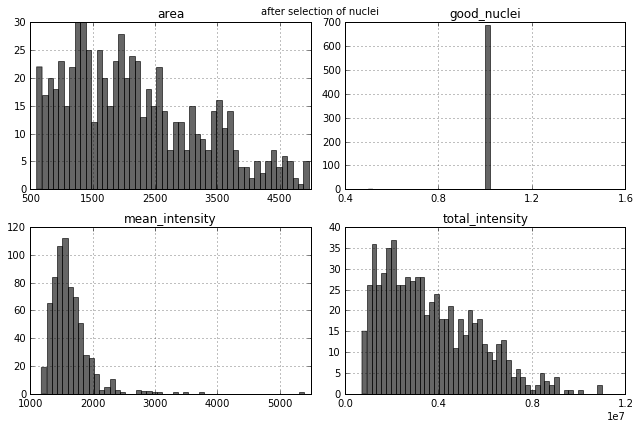

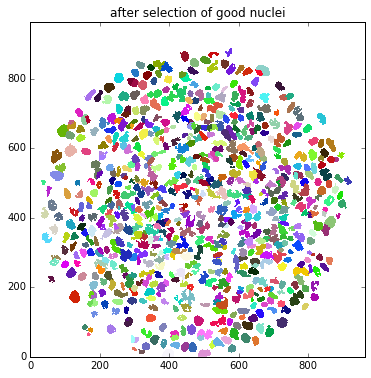

In [30]:
w.select_nuclei(quantiles=[0.2,0.85], cutoff=[600,5000], plot=1)

apply to other channels

In [31]:
# filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c2.tif'
# filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c3.tif'
# filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c4.tif'
# filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c2.tif'
# filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c3_bs.tif'
# filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c4.tif'
filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c3.tif'
filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c2.tif'
filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c4.tif'

In [32]:
# s2=tiff.imread(filename_sox2)
# _,ax=subplots(1,2, figsize=(20,10))
# ax[0].imshow(s2[9], cmap='viridis', origin='lower')
# ax[1].imshow(w.remove_background(s2,2e5)[9], cmap='viridis', origin='lower')

In [33]:
w.apply_to_channels(filename_sox2, 'sox2')
w.apply_to_channels(filename_bra, 'bra')
w.apply_to_channels(filename_sox17, 'sox17')

In [34]:
# w.df.drop('good_nuclei', axis=1, inplace=1)

In [35]:
w.df.head()
# w.good_nuclei.head()

,area,total_intensity,mean_intensity,centroid,good_nuclei,sox2,bra,sox17
cell_id,,,,,,,,
1,482,680221.0,1411.246888,"[2.48547717842, 256.784232365, 412.962655602]",False,192425.0,92029.0,65512.0
2,2665,5080696.0,1906.452533,"[5.03902439024, 285.543339587, 297.856660413]",True,961573.0,659465.0,366687.0
3,1107,1583992.0,1430.887082,"[2.2908762421, 289.041553749, 535.677506775]",True,660659.0,222655.0,152269.0
4,1298,2727125.0,2101.020801,"[2.60400616333, 317.19183359, 555.352850539]",True,609705.0,268109.0,177955.0
5,409,556054.0,1359.545232,"[1.93887530562, 367.178484108, 562.718826406]",False,209014.0,98470.0,55246.0


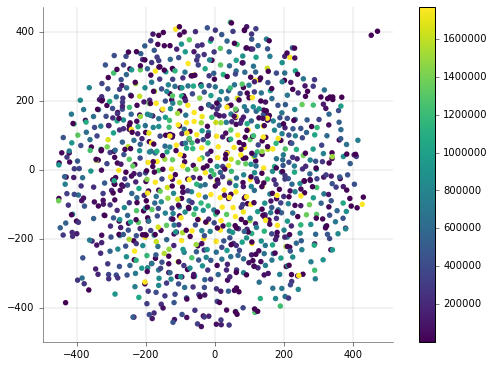

In [41]:
watershed3d.dot_plot(w, 'sox2', colormap_cutoff=0.25)
# watershed3d.dot_plot(w, 'bra', colormap_cutoff=0.3)
# watershed3d.dot_plot(w, 'sox17', colormap_cutoff=0.5)

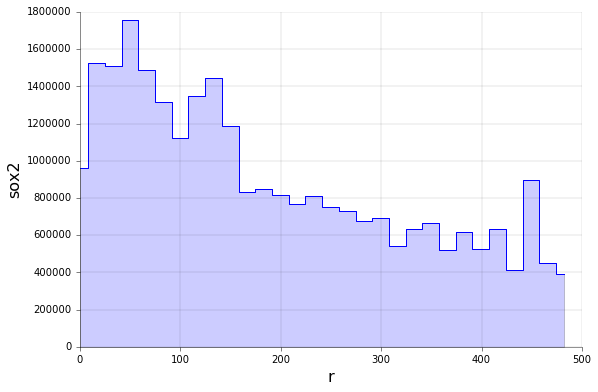

In [43]:
watershed3d.radial_profile_per_cell(w, 'sox2',30, only_selected_cells=1);
# w.radial_profile_per_cell('bra',20, only_selected_cells=1);
# w.radial_profile_per_cell('sox17',20, only_selected_cells=1);

699 1


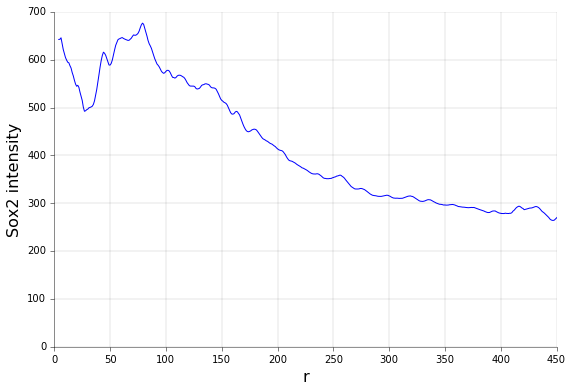

In [47]:
r,rs = watershed3d.radial_intensity(w, 'sox2', only_selected_nuclei=1, plot=False)
fig,ax=subplots()
ax.plot(r,pd.DataFrame(rs).rolling(5).mean())
ax.set_xlim([0,450])
ax.set_xlabel('r', fontsize=16)
ax.set_ylabel('Sox2 intensity', fontsize=16)
watershed3d.nice_spines(ax)

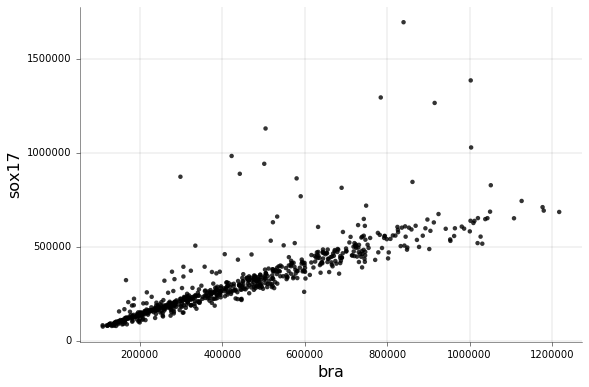

In [48]:
watershed3d.coexpression_per_cell(w, 'bra', 'sox17', only_selected_cells=1)

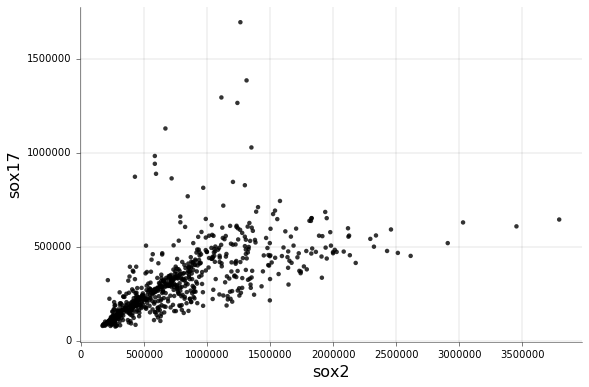

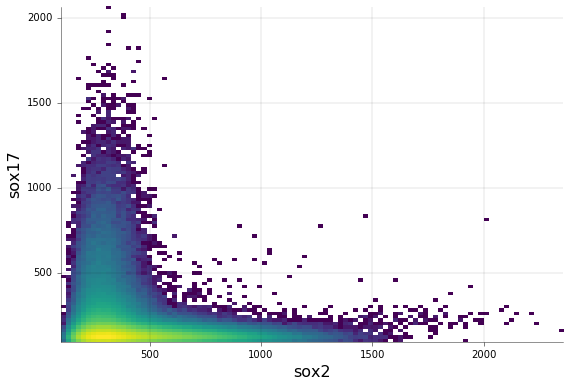

In [57]:
watershed3d.coexpression_per_cell(w, 'sox2', 'sox17', only_selected_cells=1)
watershed3d.coexpression_per_pixel(w, 'sox2', 'sox17', only_selected_cells=1, lognorm=1, bins=100)